| Group   | Sample | Alive | Dead | Survival Rate (%) |
| ------- | ------ | ----- | ---- | ----------------- |
| Control | 1      | 61    | 15   | 80                |
| Control | 2      | 23    | 5    | 82                |
| Control | 3      | 30    | 11   | 73                |
| ENU     | 1      | 45    | 2    | 93                |
| ENU     | 2      | 31    | 5    | 86                |
| ENU     | 3      | 29    | 9    | 76                |
|         |        |       |      |                   |

In [38]:
import pandas as pd
from scipy.stats import chi2_contingency, binomtest

# Данные
data = {
    'Group': ['Control', 'Control', 'Control', 'ENU', 'ENU', 'ENU'],
    'Sample': [1,2,3,1,2,3],
    'Alive': [61, 23, 30, 45, 31, 29],
    'Dead': [15, 5, 11, 2, 5, 9],
}

# Создание DataFrame
df = pd.DataFrame(data)
df

,Group,Sample,Alive,Dead
0,Control,1,61,15
1,Control,2,23,5
2,Control,3,30,11
3,ENU,1,45,2
4,ENU,2,31,5
5,ENU,3,29,9


In [39]:
for x,y in zip([61, 23, 30, 45, 31, 29], [15, 5, 11, 2, 5, 9]):
    btr = binomtest(x, x+y)
    print(x,y, btr.proportion_ci())

61 15 ConfidenceInterval(low=0.6954487493074042, high=0.8851146956511898)
23 5 ConfidenceInterval(low=0.6310666505807967, high=0.9393570911808748)
30 11 ConfidenceInterval(low=0.5705552947339179, high=0.8577869966591287)
45 2 ConfidenceInterval(low=0.8545947545117785, high=0.9948044168232747)
31 5 ConfidenceInterval(low=0.7050250518892914, high=0.9533223393969105)
29 9 ConfidenceInterval(low=0.5975876394285092, high=0.8855582951774705)


In [40]:
# Проведение хи-квадрат теста
chi2_contingency(df[['Alive', 'Dead']].values)

Chi2ContingencyResult(statistic=9.700999334502256, pvalue=0.0841643956660993, dof=5, expected_freq=array([[62.57142857, 13.42857143],
       [23.05263158,  4.94736842],
       [33.7556391 ,  7.2443609 ],
       [38.69548872,  8.30451128],
       [29.63909774,  6.36090226],
       [31.28571429,  6.71428571]]))

In [41]:
# Суммирование по группам
grouped_data = df.groupby('Group')[['Alive', 'Dead']].sum()

# Создание таблицы сопряженности
contingency_table = grouped_data[['Alive', 'Dead']].values
print(contingency_table)

# Проведение хи-квадрат теста
chi2, p, _, expected_freq = chi2_contingency(contingency_table)
print(expected_freq.round(2))

# Вывод результатов
print(f"\nχ²: {chi2}, p-value: {p}")

if p < 0.05:
    print("Различие между группами значимо.")
else:
    print("Различие между группами незначимо.")


[[114  31]
 [105  16]]
[[119.38  25.62]
 [ 99.62  21.38]]

χ²: 2.4816222608602425, p-value: 0.11518339366467908
Различие между группами незначимо.


In [42]:
from scipy.stats import fisher_exact

# Точный тест Фишера
_, p = fisher_exact(contingency_table)

print(f"Точный тест Фишера. p-value: {p}")

if p < 0.05:
    print("Различие между группами значимо.")
else:
    print("Различие между группами незначимо.")


Точный тест Фишера. p-value: 0.10608109638935878
Различие между группами незначимо.


In [43]:
df

,Group,Sample,Alive,Dead
0,Control,1,61,15
1,Control,2,23,5
2,Control,3,30,11
3,ENU,1,45,2
4,ENU,2,31,5
5,ENU,3,29,9


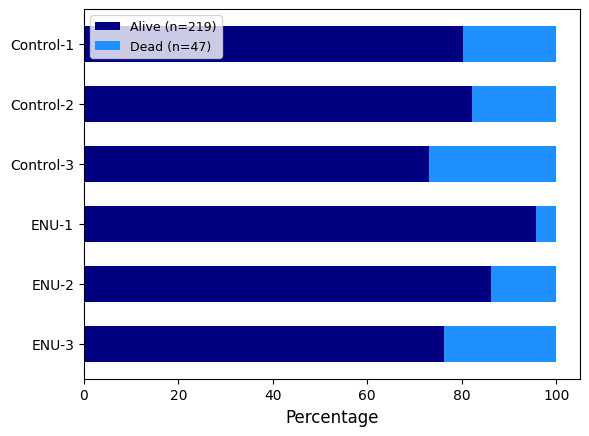

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_chi2_viz_hpv(data: pd.DataFrame, pos=[1,1,1], pval=None, legend_loc='upper left'):
    status0 = data['Alive']
    status1 = data['Dead']
    total = np.sum([status0, status1], axis=0)
    status0_percent = np.array(status0 / total * 100)
    status1_percent = np.array(status1 / total * 100)
    ylabels = data['Group'] + '-' + data['Sample'].astype('str')

    # Bar positions
    bar_positions = np.arange(len(ylabels))

    # Plot
    # fig, ax = plt.subplots(figsize=(5, 3))
    ax = plt.subplot(*pos)
    bar_width = 0.6

    ax.barh(bar_positions, status0_percent, bar_width, 
    label=f'Alive (n={sum(status0)})', 
    color='navy')
    ax.barh(bar_positions, status1_percent, bar_width, 
    left=status0_percent, label=f'Dead (n={sum(status1)})', 
    color='dodgerblue')

    ax.set_xlabel('Percentage', fontsize=12)
    ax.set_yticks(bar_positions)
    ax.set_yticklabels(ylabels, fontsize=10)
    ax.invert_yaxis()  # Invert y axis to have the top bar on top
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
    ax.legend(loc=legend_loc, fontsize=9)
    if pval:
        ax.text(0.02, 0.73, f'pval={pval:.1e}', transform=ax.transAxes,
            fontsize=10,  verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plot_chi2_viz_hpv(df)

In [54]:
df

,Group,Sample,Alive,Dead
0,Control,1,61,15
1,Control,2,23,5
2,Control,3,30,11
3,ENU,1,45,2
4,ENU,2,31,5
5,ENU,3,29,9


In [ ]:
import seaborn as sns

sns.pointplot(
    data=df, x="body_mass_g", y="island",
    errorbar=("pi", 100), capsize=.4,
    color=".5", linestyle="none", marker="D",
)